In [1]:
import sys
print(sys.executable)

C:\Users\devsh\anaconda3\envs\tensorflow_env\python.exe


In [2]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB

In [3]:
train = pd.read_csv("twitter_training.csv", header=None)
train.columns = ["id", "Company", "Sentiment", "Review"]
train.drop(columns=["id", "Company"], inplace=True)
sentiments = ['Negative', 'Neutral', 'Positive']
train = train[train.Sentiment != 'Irrelevant']
train

,Sentiment,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [4]:
np.sum(train.isnull())

Sentiment      0
Review       571
dtype: int64

,Review
Sentiment,
Negative,22358
Neutral,18108
Positive,20655


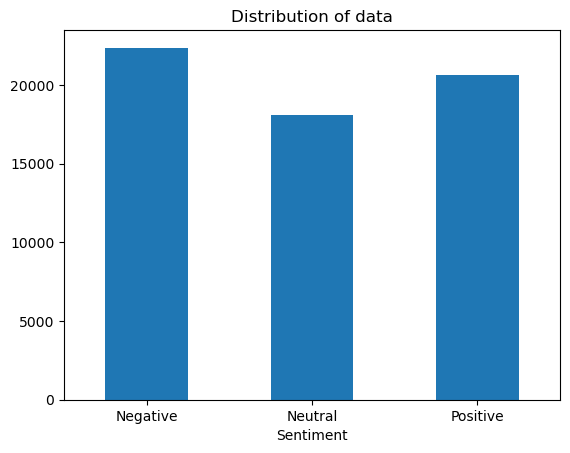

In [5]:
ax = train.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(sentiments, rotation=0)
# Storing data in lists.
text, sentiment = list(train['Review']), list(train['Sentiment'])
train.groupby('Sentiment').count()

In [6]:
train['Sentiment'] = train['Sentiment'].replace(['Negative', 'Neutral', 'Positive'], [-1, 0, 1])
train

,Sentiment,Review
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [7]:
data_pos = train[train['Sentiment'] == 1]
data_neg = train[train['Sentiment'] == -1]
data_neu = train[train['Sentiment'] == 0]
data_pos

,Sentiment,Review
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74677,1,Just realized that the Windows partition of my...
74678,1,Just realized that my Mac window partition is ...
74679,1,Just realized the windows partition of my Mac ...
74680,1,Just realized between the windows partition of...


In [8]:
dataset = pd.concat([data_pos, data_neg])
dataset

,Sentiment,Review
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
74665,-1,Nvidia really delayed the 3070 by 2 weeks.
74666,-1,Nvidia did delay by 3070 2 weeks.
74667,-1,Nvidia really delayed the 3070 several weeks.
74668,-1,Nvidia really only delayed the 3070 2 flight w...


In [9]:
dataset['Review'] = dataset['Review'].str.lower()
dataset['Review'].head()

0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Review, dtype: object

In [10]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'im', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [11]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['Review'] = dataset['Review'].apply(lambda text: cleaning_stopwords(text))
dataset['Review'].head()

0         getting borderlands murder ,
1             coming borders kill all,
2        getting borderlands kill all,
3       coming borderlands murder all,
4    getting borderlands 2 murder all,
Name: Review, dtype: object

In [12]:
import string
import re
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['Review']= dataset['Review'].apply(lambda x: cleaning_punctuations(x))
dataset['Review'].head()

0         getting borderlands murder 
1             coming borders kill all
2        getting borderlands kill all
3       coming borderlands murder all
4    getting borderlands 2 murder all
Name: Review, dtype: object

In [13]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Review'] = dataset['Review'].apply(lambda x: cleaning_numbers(x))
dataset['Review'].head()

0        getting borderlands murder 
1            coming borders kill all
2       getting borderlands kill all
3      coming borderlands murder all
4    getting borderlands  murder all
Name: Review, dtype: object

In [14]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Review'] = dataset['Review'].apply(lambda x: cleaning_URLs(x))
dataset['Review'].head()

0        getting borderlands murder 
1            coming borders kill all
2       getting borderlands kill all
3      coming borderlands murder all
4    getting borderlands  murder all
Name: Review, dtype: object

In [15]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['Review'] = dataset['Review'].apply(lambda x: cleaning_repeating_char(x))
dataset['Review'].head()

0        getting borderlands murder 
1            coming borders kill all
2       getting borderlands kill all
3      coming borderlands murder all
4    getting borderlands  murder all
Name: Review, dtype: object

In [16]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
dataset['Review'] = dataset['Review'].apply(tokenizer.tokenize)
dataset['Review'].head()

0         [getting, borderlands, murder]
1           [coming, borders, kill, all]
2      [getting, borderlands, kill, all]
3     [coming, borderlands, murder, all]
4    [getting, borderlands, murder, all]
Name: Review, dtype: object

In [17]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['Review']= dataset['Review'].apply(lambda x: stemming_on_text(x))
dataset['Review'].head()

0         [getting, borderlands, murder]
1           [coming, borders, kill, all]
2      [getting, borderlands, kill, all]
3     [coming, borderlands, murder, all]
4    [getting, borderlands, murder, all]
Name: Review, dtype: object

In [18]:
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\devsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['Review'] = dataset['Review'].apply(lambda x: lemmatizer_on_text(x))
dataset['Review'].head()

0         [getting, borderlands, murder]
1           [coming, borders, kill, all]
2      [getting, borderlands, kill, all]
3     [coming, borderlands, murder, all]
4    [getting, borderlands, murder, all]
Name: Review, dtype: object

In [20]:
X=dataset.Review
y=dataset.Sentiment

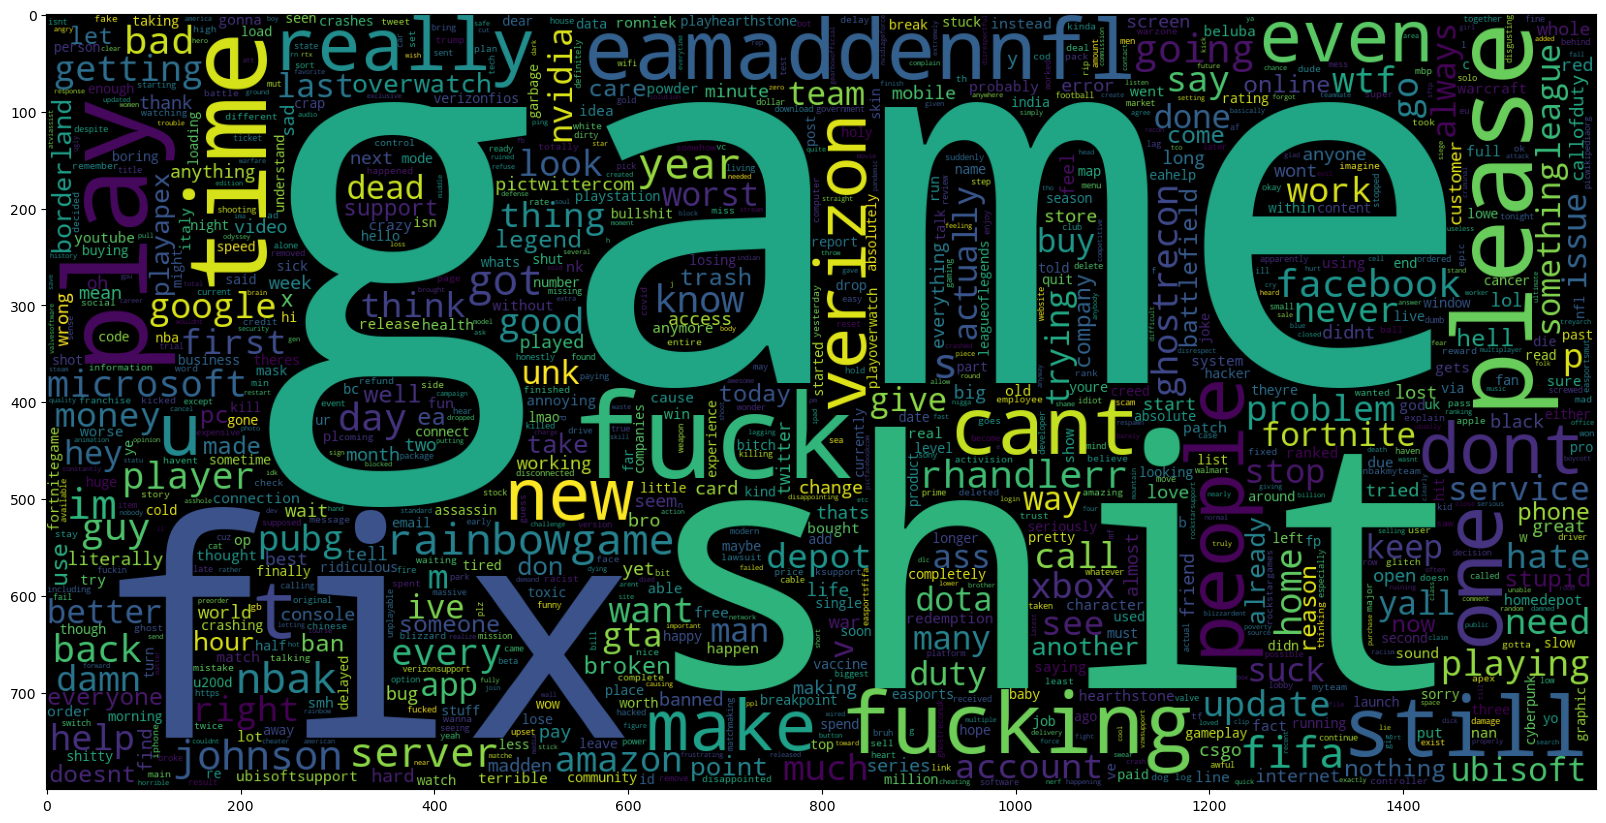

In [21]:
data_neg = dataset[dataset['Sentiment'] == -1]
data_neg = data_neg['Review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(str(v) for v in data_neg).replace("'",''))
plt.imshow(wc)

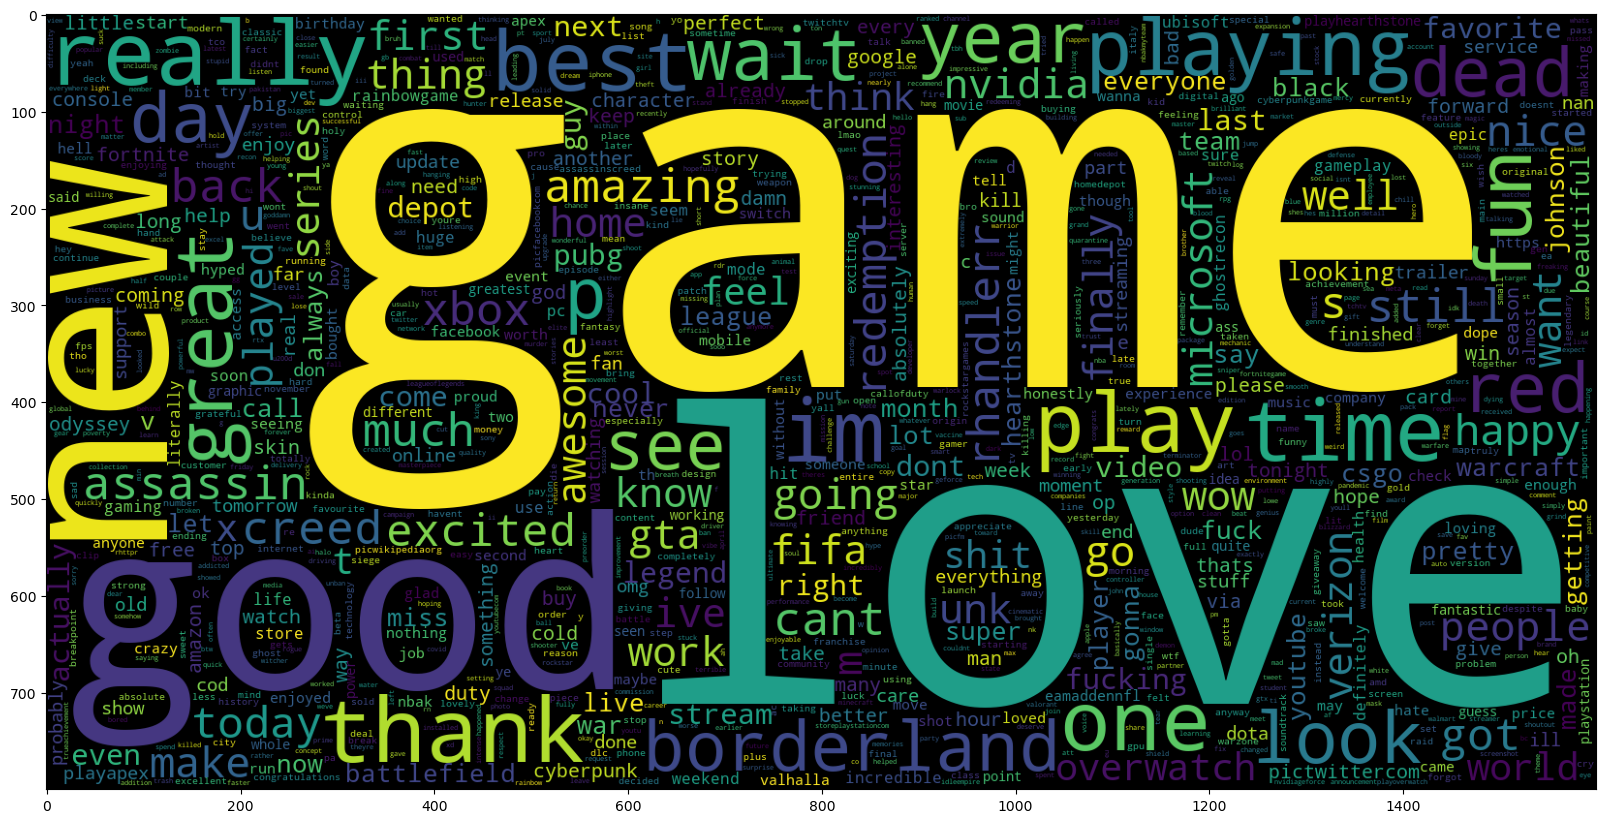

In [22]:
data_pos = dataset[dataset['Sentiment'] == 1]
data_pos = data_pos['Review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(str(v) for v in data_pos).replace("'",''))
plt.imshow(wc)

In [25]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
dataset.shape

No. of feature_words:  182986


C:\Users\devsh\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(43374, 2)

In [27]:
X_train = vectoriser.transform(X_train.apply(lambda x: ' '.join(x)))
X_test  = vectoriser.transform(X_test.apply(lambda x: ' '.join(x)))

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

          -1       0.99      0.86      0.92      1126
           1       0.87      0.99      0.93      1043

    accuracy                           0.92      2169
   macro avg       0.93      0.93      0.92      2169
weighted avg       0.93      0.92      0.92      2169



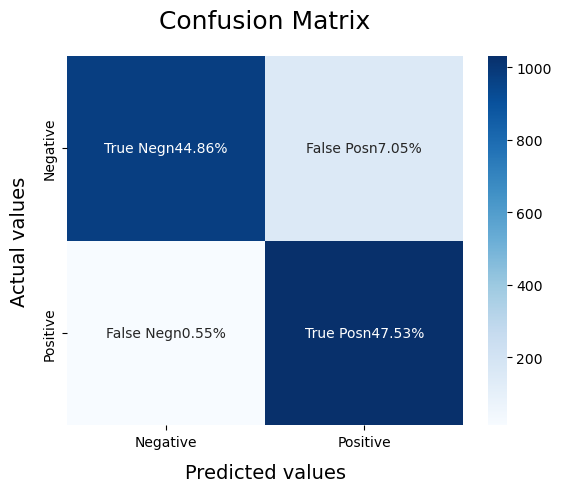

In [29]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

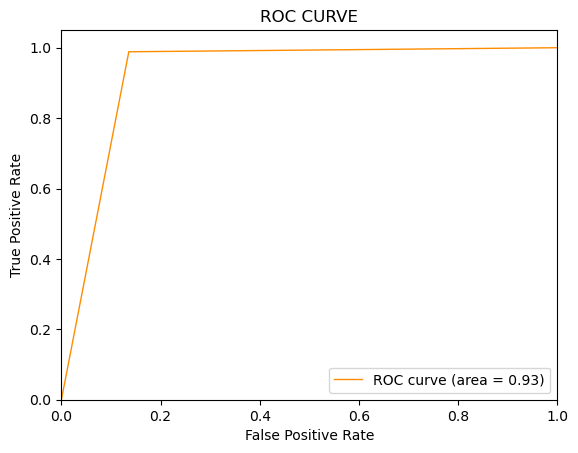

In [30]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1126
           1       0.94      0.97      0.96      1043

    accuracy                           0.96      2169
   macro avg       0.96      0.96      0.96      2169
weighted avg       0.96      0.96      0.96      2169



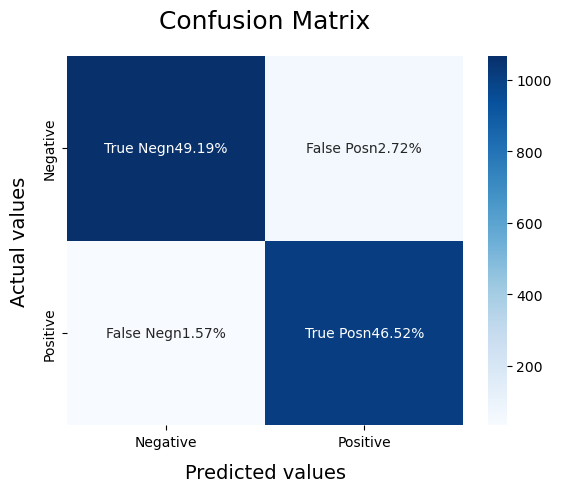

In [31]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

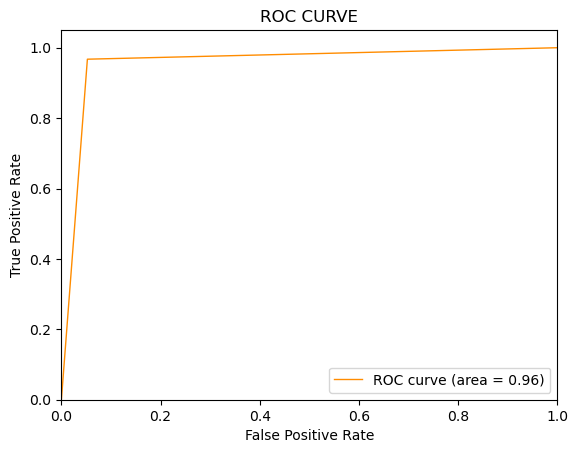

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1126
           1       0.94      0.94      0.94      1043

    accuracy                           0.94      2169
   macro avg       0.94      0.94      0.94      2169
weighted avg       0.94      0.94      0.94      2169



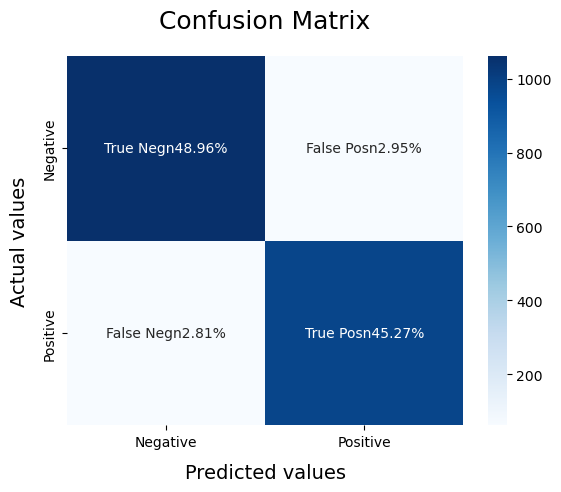

In [34]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

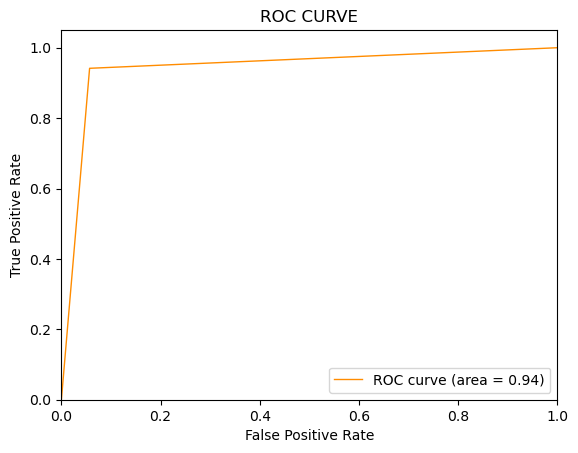

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

          -1       0.95      0.94      0.95      1126
           1       0.94      0.95      0.95      1043

    accuracy                           0.95      2169
   macro avg       0.95      0.95      0.95      2169
weighted avg       0.95      0.95      0.95      2169



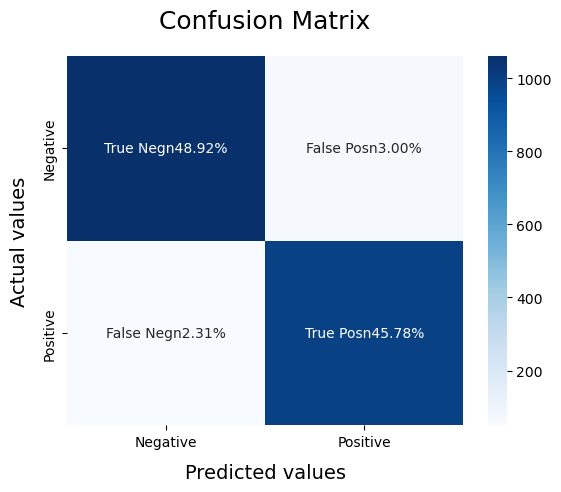

In [37]:
rf = RandomForestClassifier()
# scores = cross_val_score(rf, X_train, y_train.values.ravel(),cv=5)
rf.fit(X_train, y_train)
model_Evaluate(rf)
y_pred3 = rf.predict(X_test)